In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [4]:
sns.set_theme(style="whitegrid")


In [5]:
import pandas as pd

train = pd.read_parquet("train.parquet")
test = pd.read_parquet("test.parquet")

train.shape, test.shape



((20000, 11), (5000, 11))

In [6]:
train.head()
train.info()
train.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Age              20000 non-null  int64  
 1   Income           20000 non-null  float64
 2   CreditScore      17617 non-null  float64
 3   LoanAmount       20000 non-null  float64
 4   EmploymentYears  20000 non-null  int64  
 5   NumDependents    20000 non-null  int64  
 6   DebtToIncome     20000 non-null  float64
 7   EducationLevel   20000 non-null  int64  
 8   FavoriteColor    20000 non-null  object 
 9   Hobby            20000 non-null  object 
 10  Default          20000 non-null  int64  
dtypes: float64(4), int64(5), object(2)
memory usage: 1.7+ MB


,Age,Income,CreditScore,LoanAmount,EmploymentYears,NumDependents,DebtToIncome,EducationLevel,Default
count,20000.000000,20000.000000,17617.000000,20000.000000,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000
mean,44.959150,50004.431236,574.118635,20030.527761,19.369250,1.98985,0.502592,2.506150,0.343150
std,14.083764,15019.289666,159.041321,4992.059462,11.548159,1.41193,0.289153,1.116882,0.474773
min,21.000000,-16984.057953,300.000000,-2314.842635,0.000000,0.00000,0.000018,1.000000,0.000000
25%,33.000000,39716.883271,437.000000,16646.478319,9.000000,1.00000,0.251572,2.000000,0.000000
50%,45.000000,50084.103696,575.000000,20046.233086,19.000000,2.00000,0.501503,3.000000,0.000000
75%,57.000000,60285.318369,711.000000,23393.056940,29.000000,3.00000,0.753517,4.000000,1.000000
max,69.000000,117186.263765,849.000000,38800.776243,39.000000,4.00000,0.999984,4.000000,1.000000


In [7]:
train["Default"].value_counts()
train["Default"].value_counts(normalize=True)


Default
0    0.65685
1    0.34315
Name: proportion, dtype: float64

### Rozkład zmiennej docelowej
Zmienna Default jest umiarkowanie niezbalansowana (ok. 66% vs 34%).
W związku z tym w dalszej analizie wykorzystane zostaną metryki
inne niż accuracy (np. ROC-AUC).

In [8]:
train.isna().sum()
(train.isna().mean() * 100).round(2)


Age                 0.00
Income              0.00
CreditScore        11.92
LoanAmount          0.00
EmploymentYears     0.00
NumDependents       0.00
DebtToIncome        0.00
EducationLevel      0.00
FavoriteColor       0.00
Hobby               0.00
Default             0.00
dtype: float64

### Braki danych
Jedyną zmienną zawierającą braki danych jest CreditScore (ok. 11,9% obserwacji).
Pozostałe cechy oraz zmienna docelowa są kompletne, co świadczy o dobrej jakości danych.
Sposób obsługi braków zostanie uwzględniony na etapie przygotowania danych do modelowania.

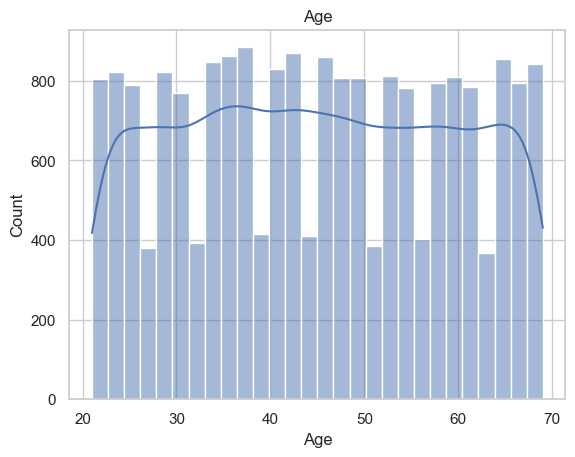

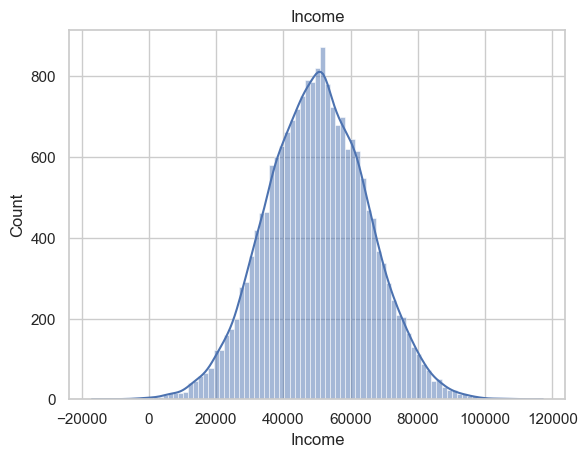

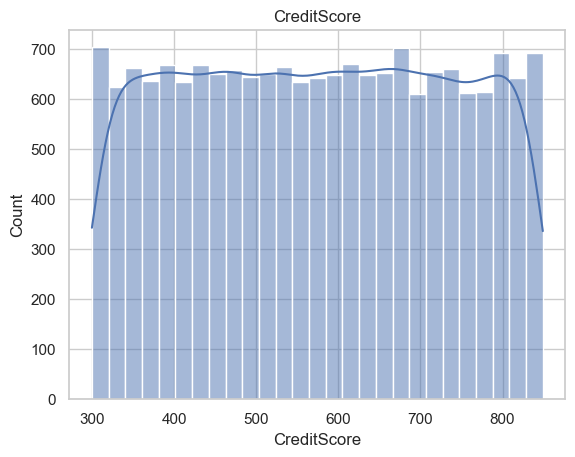

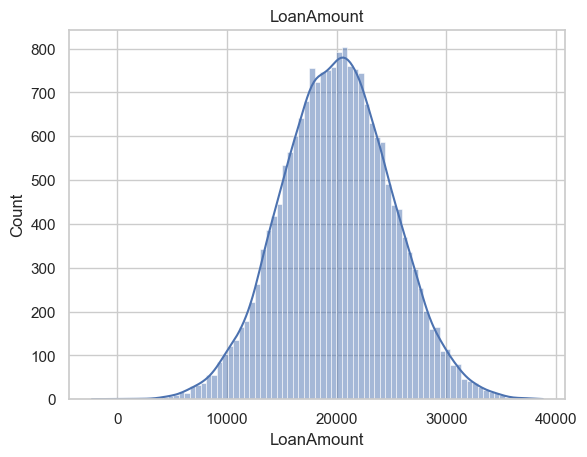

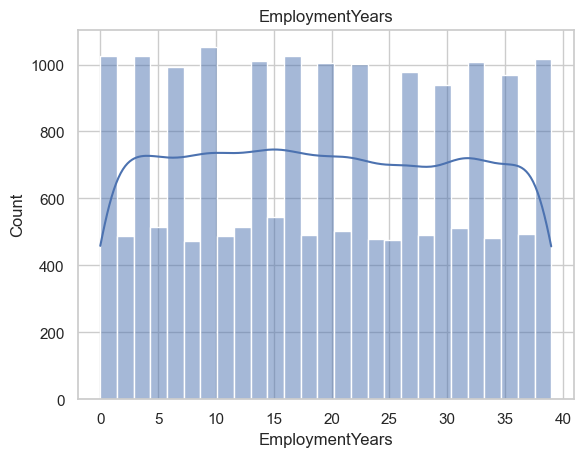

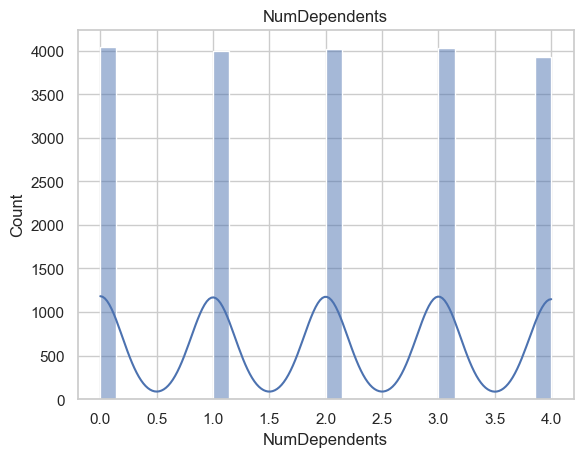

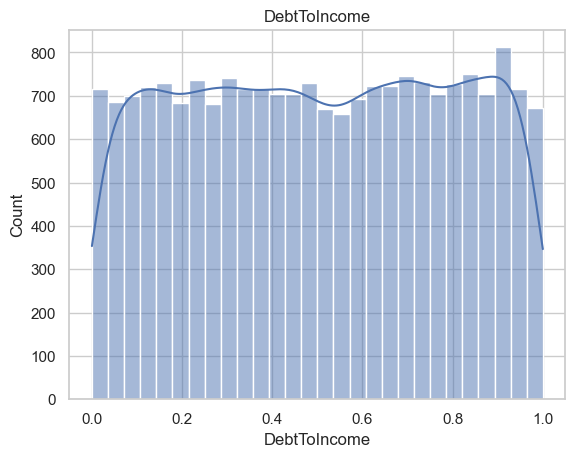

In [9]:
num_cols = ["Age", "Income", "CreditScore", "LoanAmount",
            "EmploymentYears", "NumDependents", "DebtToIncome"]

for col in num_cols:
    sns.histplot(train[col], kde=True)
    plt.title(col)
    plt.show()


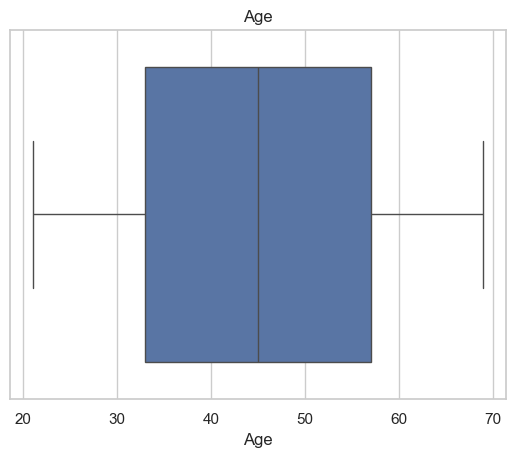

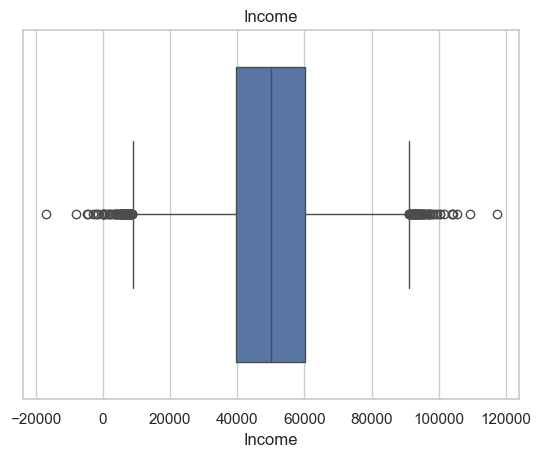

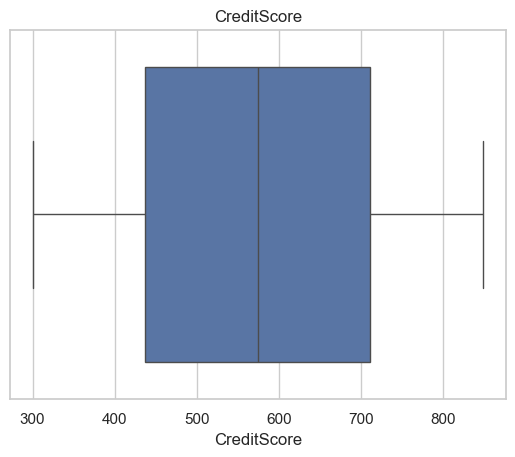

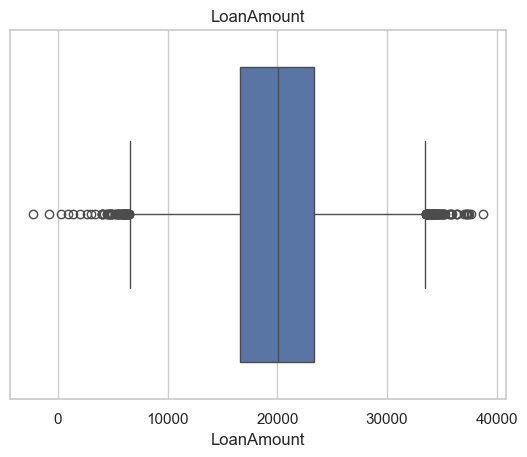

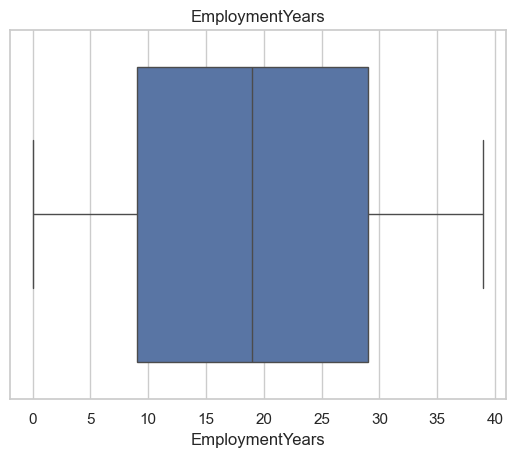

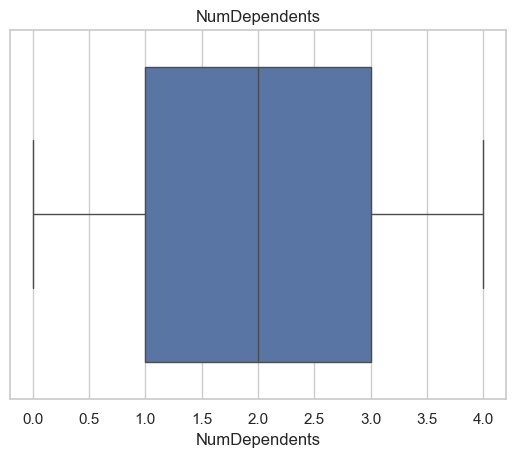

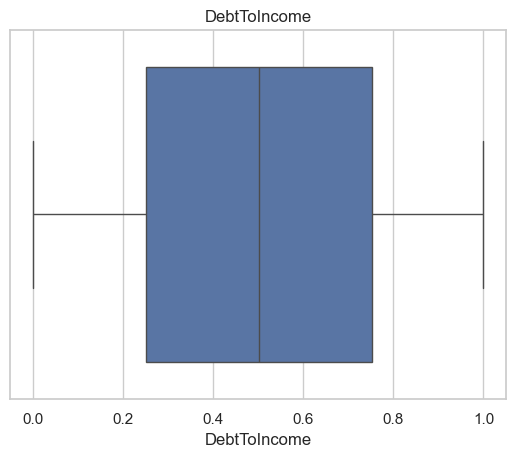

In [10]:
for col in num_cols:
    sns.boxplot(x=train[col])
    plt.title(col)
    plt.show()


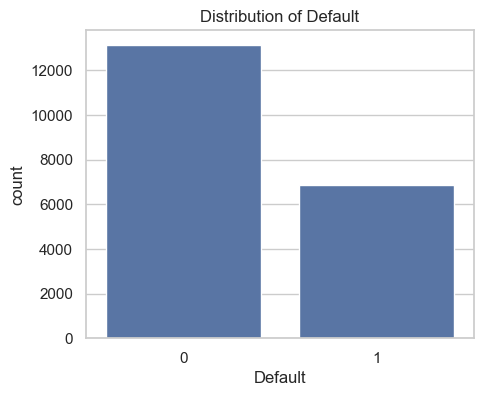

In [12]:
plt.figure(figsize=(5,4))
sns.countplot(x="Default", data=train)
plt.title("Distribution of Default")
plt.savefig("docs/img/default_distribution.png", dpi=150, bbox_inches="tight")
plt.show()


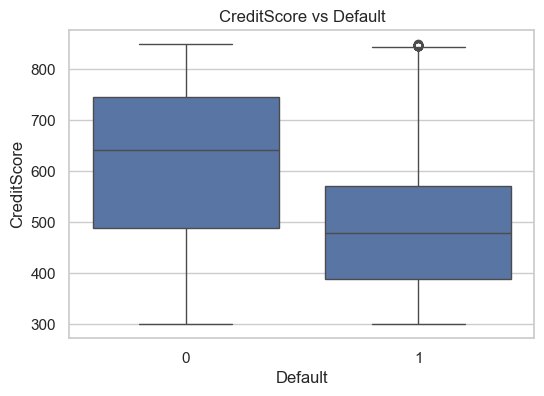

In [11]:
plt.figure(figsize=(6, 4))
sns.boxplot(x="Default", y="CreditScore", data=train)
plt.title("CreditScore vs Default")

plt.savefig("docs/img/creditscore_vs_default.png", dpi=150, bbox_inches="tight")
plt.show()


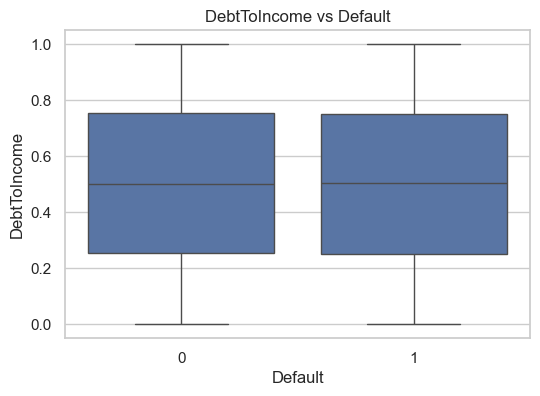

In [13]:
plt.figure(figsize=(6,4))
sns.boxplot(x="Default", y="DebtToIncome", data=train)
plt.title("DebtToIncome vs Default")
plt.savefig("docs/img/dti_vs_default.png", dpi=150, bbox_inches="tight")
plt.show()


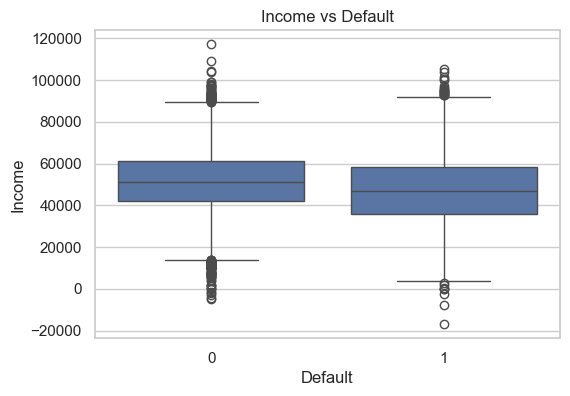

In [14]:
plt.figure(figsize=(6,4))
sns.boxplot(x="Default", y="Income", data=train)
plt.title("Income vs Default")
plt.savefig("docs/img/income_vs_default.png", dpi=150, bbox_inches="tight")
plt.show()


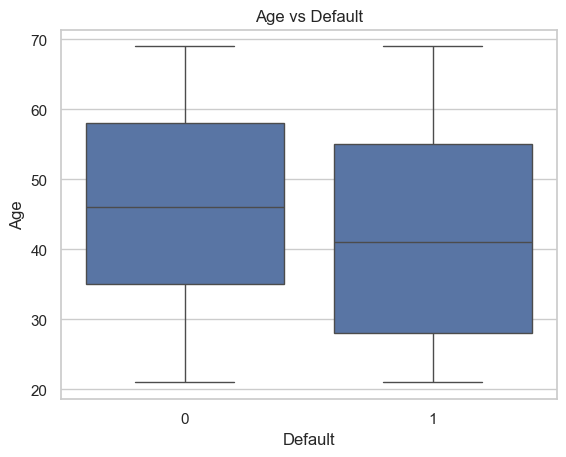

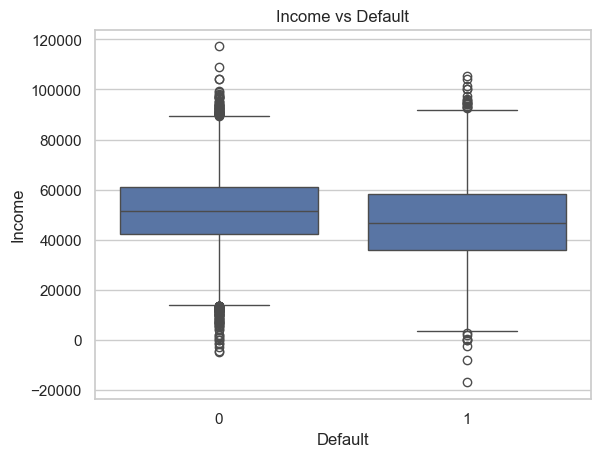

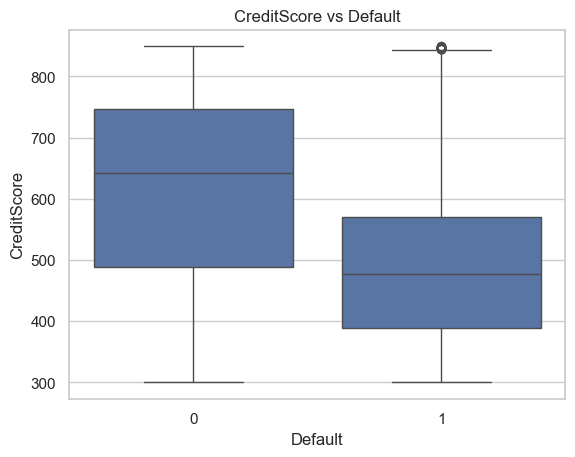

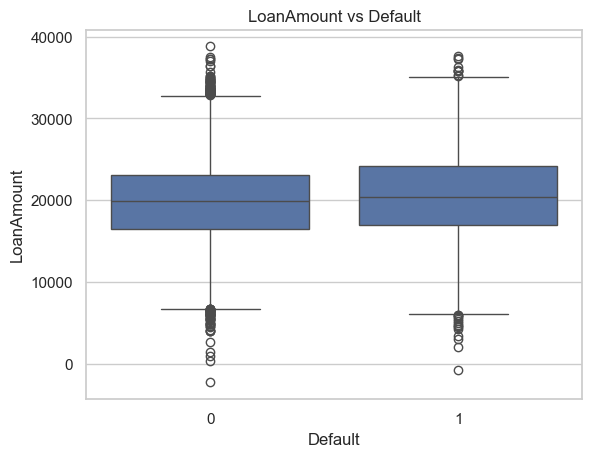

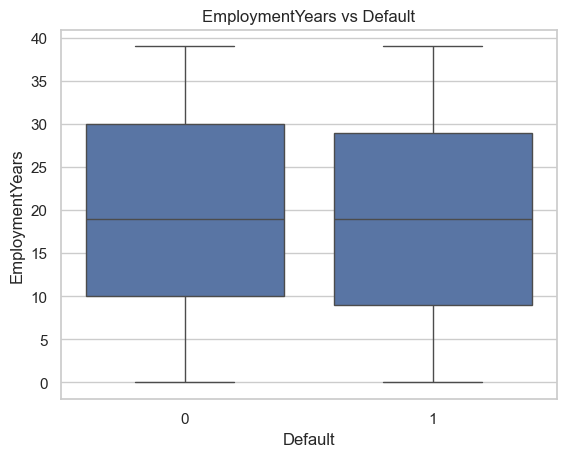

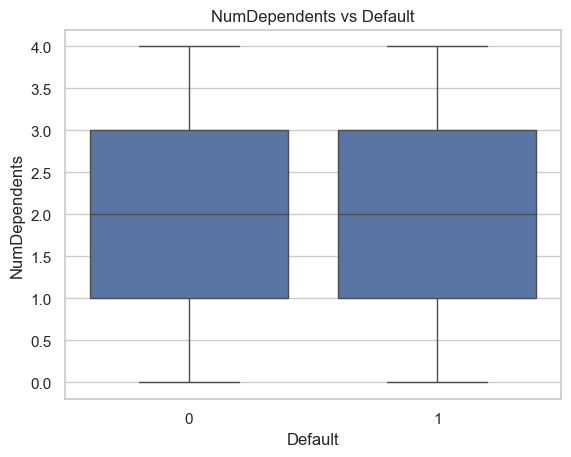

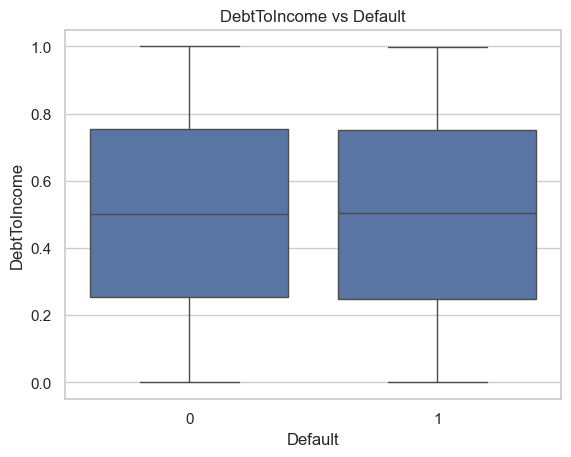

In [10]:
for col in num_cols:
    sns.boxplot(x="Default", y=col, data=train)
    plt.title(f"{col} vs Default")
    plt.show()


### CreditScore a niewypłacalność

Wykres pudełkowy pokazuje wyraźne różnice w rozkładzie zmiennej `CreditScore`
pomiędzy klientami wypłacalnymi i niewypłacalnymi. Klienci z defaultem
charakteryzują się istotnie niższą medianą oceny kredytowej, co potwierdza,
że CreditScore jest jedną z kluczowych cech predykcyjnych w tym zbiorze danych.

Jednocześnie częściowe nakładanie się rozkładów wskazuje, że sama wartość
CreditScore nie jest wystarczająca do jednoznacznej klasyfikacji klientów.
Oznacza to, że skuteczna predykcja ryzyka wymaga uwzględnienia również innych
zmiennych, takich jak dochód, relacja zadłużenia do dochodu czy stabilność
zatrudnienia.

Z perspektywy biznesowej potwierdza to zasadność stosowania modeli
wielowymiarowych – decyzja kredytowa nie powinna opierać się na pojedynczym
wskaźniku, lecz na kombinacji wielu cech opisujących sytuację klienta.


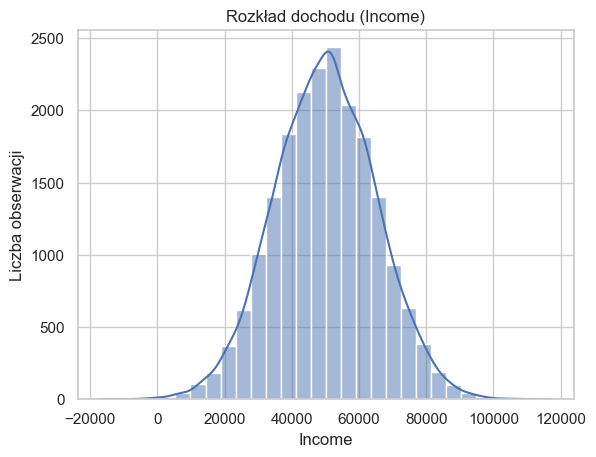

In [11]:
sns.histplot(train["Income"], bins=30, kde=True)
plt.title("Rozkład dochodu (Income)")
plt.xlabel("Income")
plt.ylabel("Liczba obserwacji")
plt.show()


### Rozkład dochodu
Rozkład dochodu jest zbliżony do normalnego, jednak widoczne są wartości ujemne,
które w kontekście biznesowym są trudne do interpretacji.
Może to wskazywać na:
- błędy w danych,
- specjalne przypadki (np. straty, działalność gospodarcza),
- konieczność walidacji lub transformacji tej cechy przed modelowaniem.

Obecność takich wartości może negatywnie wpływać na działanie niektórych modeli
oraz interpretację wyników, dlatego zostanie uwzględniona na etapie
feature engineering.


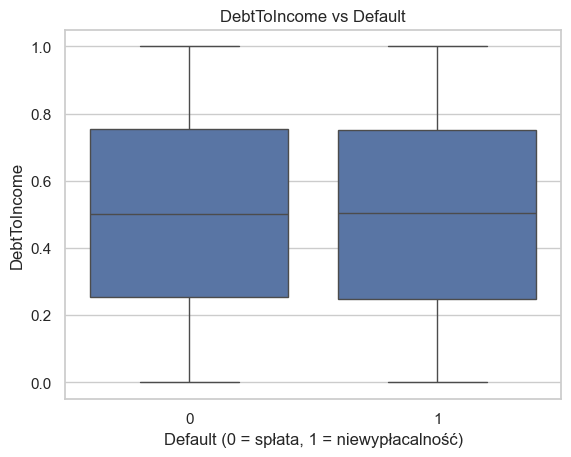

In [12]:
sns.boxplot(x="Default", y="DebtToIncome", data=train)
plt.title("DebtToIncome vs Default")
plt.xlabel("Default (0 = spłata, 1 = niewypłacalność)")
plt.ylabel("DebtToIncome")
plt.show()


### DebtToIncome a niewypłacalność
Wartość wskaźnika `DebtToIncome` jest wyższa wśród klientów niewypłacalnych,
co wskazuje, że relacja zadłużenia do dochodu ma istotny związek z ryzykiem defaultu.

Jednocześnie rozkłady częściowo się pokrywają, co sugeruje, że zmienna ta
nie wystarcza do samodzielnej klasyfikacji klientów, lecz stanowi ważny element
w modelu wielowymiarowym.

Z perspektywy biznesowej jest to zgodne z intuicją – im większa część dochodu
przeznaczana jest na obsługę zobowiązań, tym mniejszy margines bezpieczeństwa
pozostaje w przypadku nieprzewidzianych zdarzeń finansowych.


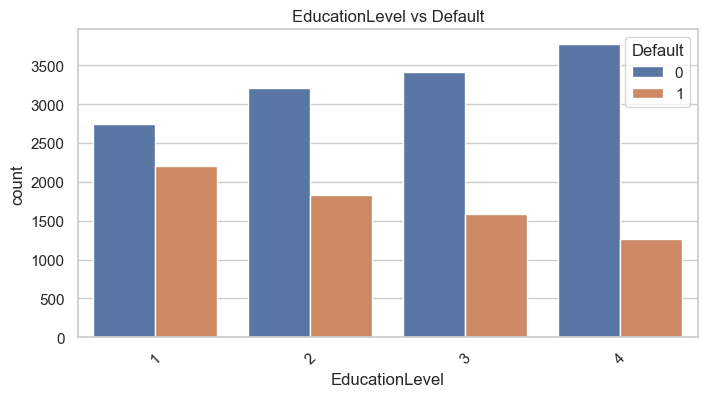

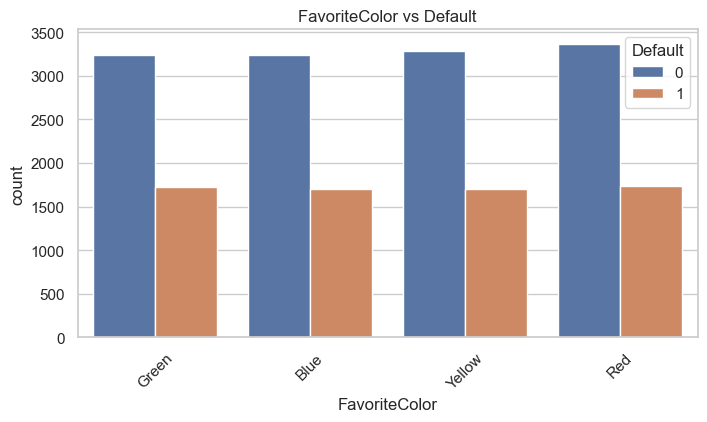

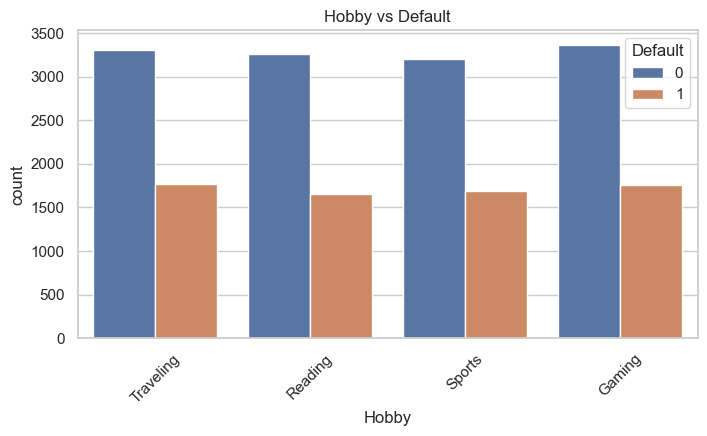

In [13]:
cat_cols = ["EducationLevel", "FavoriteColor", "Hobby"]

for col in cat_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(x=col, hue="Default", data=train)
    plt.title(f"{col} vs Default")
    plt.xticks(rotation=45)
    plt.show()


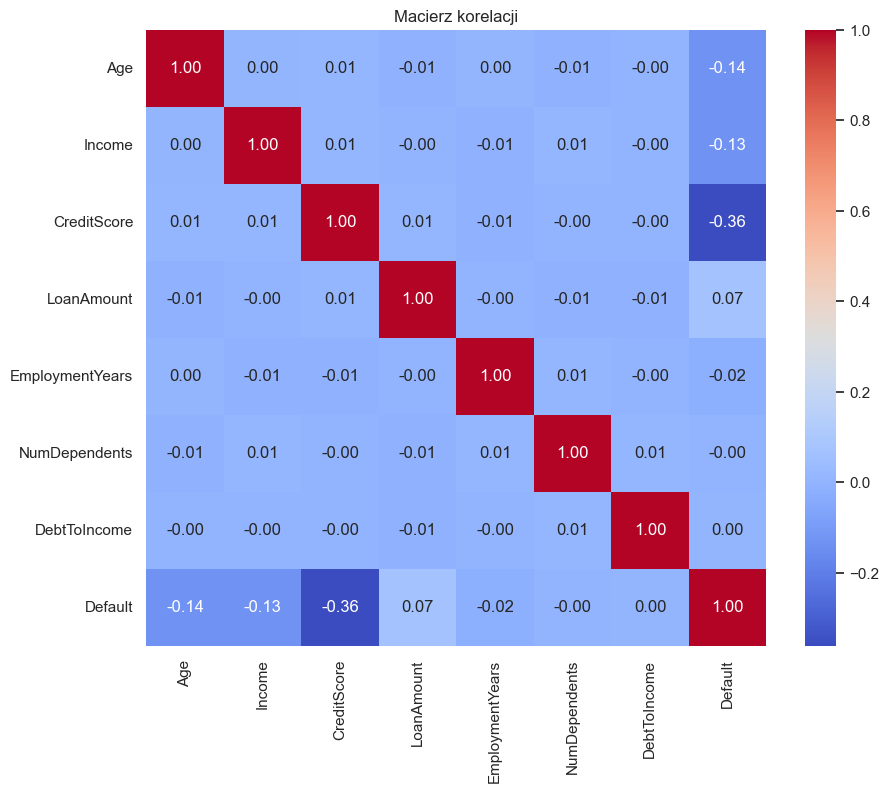

In [14]:
num_cols = ["Age", "Income", "CreditScore", "LoanAmount",
            "EmploymentYears", "NumDependents", "DebtToIncome"]

corr = train[num_cols + ["Default"]].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Macierz korelacji")
plt.show()


In [9]:
train.groupby("Default")["CreditScore"].median()

Default
0    642.0
1    478.0
Name: CreditScore, dtype: float64

Analiza mediany CreditScore potwierdza obserwacje z wykresu pudełkowego.
Mediana oceny kredytowej dla klientów wypłacalnych wynosi 642, natomiast
dla klientów niewypłacalnych 478, co wskazuje na istotną różnicę pomiędzy
obiema grupami i potwierdza wysoką wartość predykcyjną tej cechy.

### Uwagi dotyczące cech kategorycznych
Część cech kategorycznych (FavoriteColor, Hobby) nie ma oczywistego
uzasadnienia biznesowego w kontekście ryzyka kredytowego. Ich potencjalna
wartość predykcyjna zostanie zweryfikowana na etapie modelowania.

## Podsumowanie EDA

Analiza eksploracyjna danych objęła ocenę jakości danych, rozkładu zmiennej docelowej
oraz relacji pomiędzy kluczowymi cechami a niewypłacalnością klientów.

Zmienna docelowa `Default` jest umiarkowanie niezbalansowana
(ok. 66% klientów wypłacalnych vs 34% niewypłacalnych),
dlatego w dalszych etapach analizy zastosowane zostaną metryki inne niż accuracy,
takie jak ROC-AUC oraz miary oparte o recall.

Dane charakteryzują się ogólnie wysoką jakością – jedyną zmienną zawierającą braki
jest `CreditScore` (ok. 11,9% obserwacji). Jednocześnie w niektórych cechach
numerycznych (np. `Income`, `LoanAmount`) pojawiają się wartości trudne do
interpretacji biznesowej, co wskazuje na potrzebę walidacji i odpowiedniego
przygotowania danych przed modelowaniem.

Analiza wykazała, że `CreditScore` jest silnie związany z niewypłacalnością –
mediana oceny kredytowej dla klientów niewypłacalnych wynosi 478,
podczas gdy dla klientów wypłacalnych 642, co potwierdza wysoką wartość
predykcyjną tej cechy. Z kolei zmienne takie jak `DebtToIncome` wykazują
ograniczoną zdolność do samodzielnej separacji klas, jednak mogą wnosić
istotną wartość w modelu wielowymiarowym.

Część cech kategorycznych (`FavoriteColor`, `Hobby`) nie ma oczywistego
uzasadnienia biznesowego w kontekście ryzyka kredytowego – ich realna wartość
predykcyjna zostanie zweryfikowana na etapie modelowania.

Na podstawie przeprowadzonej EDA dane zostały uznane za gotowe do dalszego etapu
analizy, obejmującego imputację braków danych, przygotowanie cech oraz budowę
modelu predykcyjnego.
